In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import cv2

In [3]:
import os
import sys

In [4]:
from math import floor, ceil

In [5]:
from tensorflow import convert_to_tensor, Tensor, constant

In [6]:
os.path.isdir('./dataset')

True

In [7]:
imgpaths = {}

In [8]:
pth = './dataset/png'
for d in os.listdir(pth):
    if not os.path.isdir(pth + '/' + d):
        continue
    for img in os.listdir(pth + '/' +d):
        path = './dataset/png/'+d
        if d not in imgpaths:
            imgpaths[d] = []
        imgpaths[d].append(path + '/' + img)

In [9]:
imgpaths.keys()

dict_keys(['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with stem', 'flying bird', 'flying saucer', 'foot', 'fork', 'frog', 'fryin

In [10]:
imgpaths['airplane'][:10]

['./dataset/png/airplane/1.png',
 './dataset/png/airplane/10.png',
 './dataset/png/airplane/11.png',
 './dataset/png/airplane/12.png',
 './dataset/png/airplane/13.png',
 './dataset/png/airplane/14.png',
 './dataset/png/airplane/15.png',
 './dataset/png/airplane/16.png',
 './dataset/png/airplane/17.png',
 './dataset/png/airplane/18.png']

In [11]:
os.listdir('./dataset/png')

['airplane',
 'alarm clock',
 'angel',
 'ant',
 'apple',
 'arm',
 'armchair',
 'ashtray',
 'axe',
 'backpack',
 'banana',
 'barn',
 'baseball bat',
 'basket',
 'bathtub',
 'bear (animal)',
 'bed',
 'bee',
 'beer-mug',
 'bell',
 'bench',
 'bicycle',
 'binoculars',
 'blimp',
 'book',
 'bookshelf',
 'boomerang',
 'bottle opener',
 'bowl',
 'brain',
 'bread',
 'bridge',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cabinet',
 'cactus',
 'cake',
 'calculator',
 'camel',
 'camera',
 'candle',
 'cannon',
 'canoe',
 'car (sedan)',
 'carrot',
 'castle',
 'cat',
 'cell phone',
 'chair',
 'chandelier',
 'church',
 'cigarette',
 'cloud',
 'comb',
 'computer monitor',
 'computer-mouse',
 'couch',
 'cow',
 'crab',
 'crane (machine)',
 'crocodile',
 'crown',
 'cup',
 'diamond',
 'dog',
 'dolphin',
 'donut',
 'door',
 'door handle',
 'dragon',
 'duck',
 'ear',
 'elephant',
 'envelope',
 'eye',
 'eyeglasses',
 'face',
 'fan',
 'feather',
 'filelist.txt',
 'fire hydrant',
 'fish',
 'flashlight',
 'floo

In [71]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, db_dir, batch_size, input_shape, num_classes=None, 
                 shuffle=True, dir_classes=False):
        
        # todo: fix num classes
        
        self.current_counter = 0
        self.label_dict = {}

        self.input_shape = input_shape
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        
        # load the data from the root directory
        self.data, self.labels = self.get_data(db_dir)
        self.indices = np.arange(len(self.data))
        self.on_epoch_end()


    def get_data(self, root_dir):
        """"
        Loads the paths to the images and their corresponding labels from the database directory
        """
        self.data = []
        self.labels = []

        path = root_dir
        pth = path
        
        #pth = './dataset/png'
        for d in os.listdir(pth):
            if not os.path.isdir(pth + '/' + d):
                continue
            for img in os.listdir(pth + '/' + d):
                path = './dataset/png/'+ d
                if d not in imgpaths:
                    imgpaths[d] = []
                imgpaths[d].append(path + '/' + img)
                
        for i in imgpaths.keys():
            for j in imgpaths[i]:
                self.data.append(j)
                self.labels.append(i)

        return self.data, self.labels

    def __len__(self):
        """
        Returns the number of batches per epoch: the total size of the dataset divided by the batch size
        """
        return int(np.floor(len(self.data) / self.batch_size))
        # TODO your code  here (size of dataset divided by the batch size)
        return 0
    
    def vec_to_tensor(self, v):
      return constant(v)
    
    """
        Preprocesses before outputting to .fit()
        This can mean: reshape, channel count check, mean subtraction and std. dev division.
    """
    def batch_to_train(self, batch_x, batch_y):
        x_train = [self.vec_to_tensor(x) for x in batch_x]
        y_train = [self.vec_to_tensor(x) for x in batch_y]

        #print(self.input_shape)
        x_train = [cv2.resize(np.array(i), (self.input_shape[0], self.input_shape[1])) for i in x_train]
        x_train2 = []
        y_train2 = []

        for i in range(len(x_train)):
          if (x_train[i].shape[0] == self.input_shape[0] and x_train[i].shape[1] == self.input_shape[1]):
            x_train2.append(x_train[i])
            y_train2.append([y_train[i].numpy(), 0 if y_train[i].numpy() == 1 else 1])

        y_test = y_train2[:floor(1/5 * self.batch_size)]
        x_test = x_train2[:floor(1/5 * self.batch_size)]

        x_train = x_train2[ceil(1/5 * self.batch_size + 1):]
        y_train = y_train2[ceil(1/5 * self.batch_size + 1):]

        
        
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        
#         mean = x_train.mean(axis=(0, 1, 2))
#         x_train[..., 0] = x_train[..., 0] - mean[0]
#         x_train[..., 1] = x_train[..., 1] - mean[1]
#         x_train[..., 2] = x_train[..., 2] - mean[2]
        
        x_test = np.array(x_test)
        y_test = np.array(y_test)
            
        return x_train[0], y_train

    def __getitem__(self, index):
        """"
        Generates a batch of data
        Note: computation intensivity
        """

        batch_indices = self.indices[index*self.batch_size : (index+1)*self.batch_size]
        
        batch_x = [] # TODO load the image(s) from batch_indices
        batch_y = [] # TODO load the corresponding labels of the images you loaded

        for i in batch_indices:
          ci = self.data[i]
          cl = self.labels[i]
            
          cd = Image.open(ci) #.convert('L')
          cd = np.array(cd)

#           if (len(cd.shape) != 3):
#             continue
          # reshape?

          batch_x.append(cd)
          batch_y.append(cl)
        
         

        # optionally you can use: batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=self.num_classes)
        return self.batch_to_train(batch_x, batch_y)

    def on_epoch_end(self):
        """"
        Called at the end of each epoch
        """
        # if required, shuffle your data after each epoch
        self.indices = np.arange(len(self.data))
        if self.shuffle:
            # TODO shuffle data
            # you might find np.random.shuffle useful here
            np.random.shuffle(self.indices)

In [72]:
class DataVisualizer:
    @staticmethod
    def plot_batch(vec):
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[16, 16], dpi=(200))
        for i in range(len(axes)):
            axes[i].imshow(vec[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=255., interpolation="none")
        plt.show()

In [73]:
d = DataGenerator(
    db_dir='./dataset/png',
    batch_size=12,
    input_shape=(440, 440),
    dir_classes=True
)

In [74]:
d.data[:10]

['./dataset/png/airplane/1.png',
 './dataset/png/airplane/10.png',
 './dataset/png/airplane/11.png',
 './dataset/png/airplane/12.png',
 './dataset/png/airplane/13.png',
 './dataset/png/airplane/14.png',
 './dataset/png/airplane/15.png',
 './dataset/png/airplane/16.png',
 './dataset/png/airplane/17.png',
 './dataset/png/airplane/18.png']

TypeError: Image data of dtype |S11 cannot be converted to float

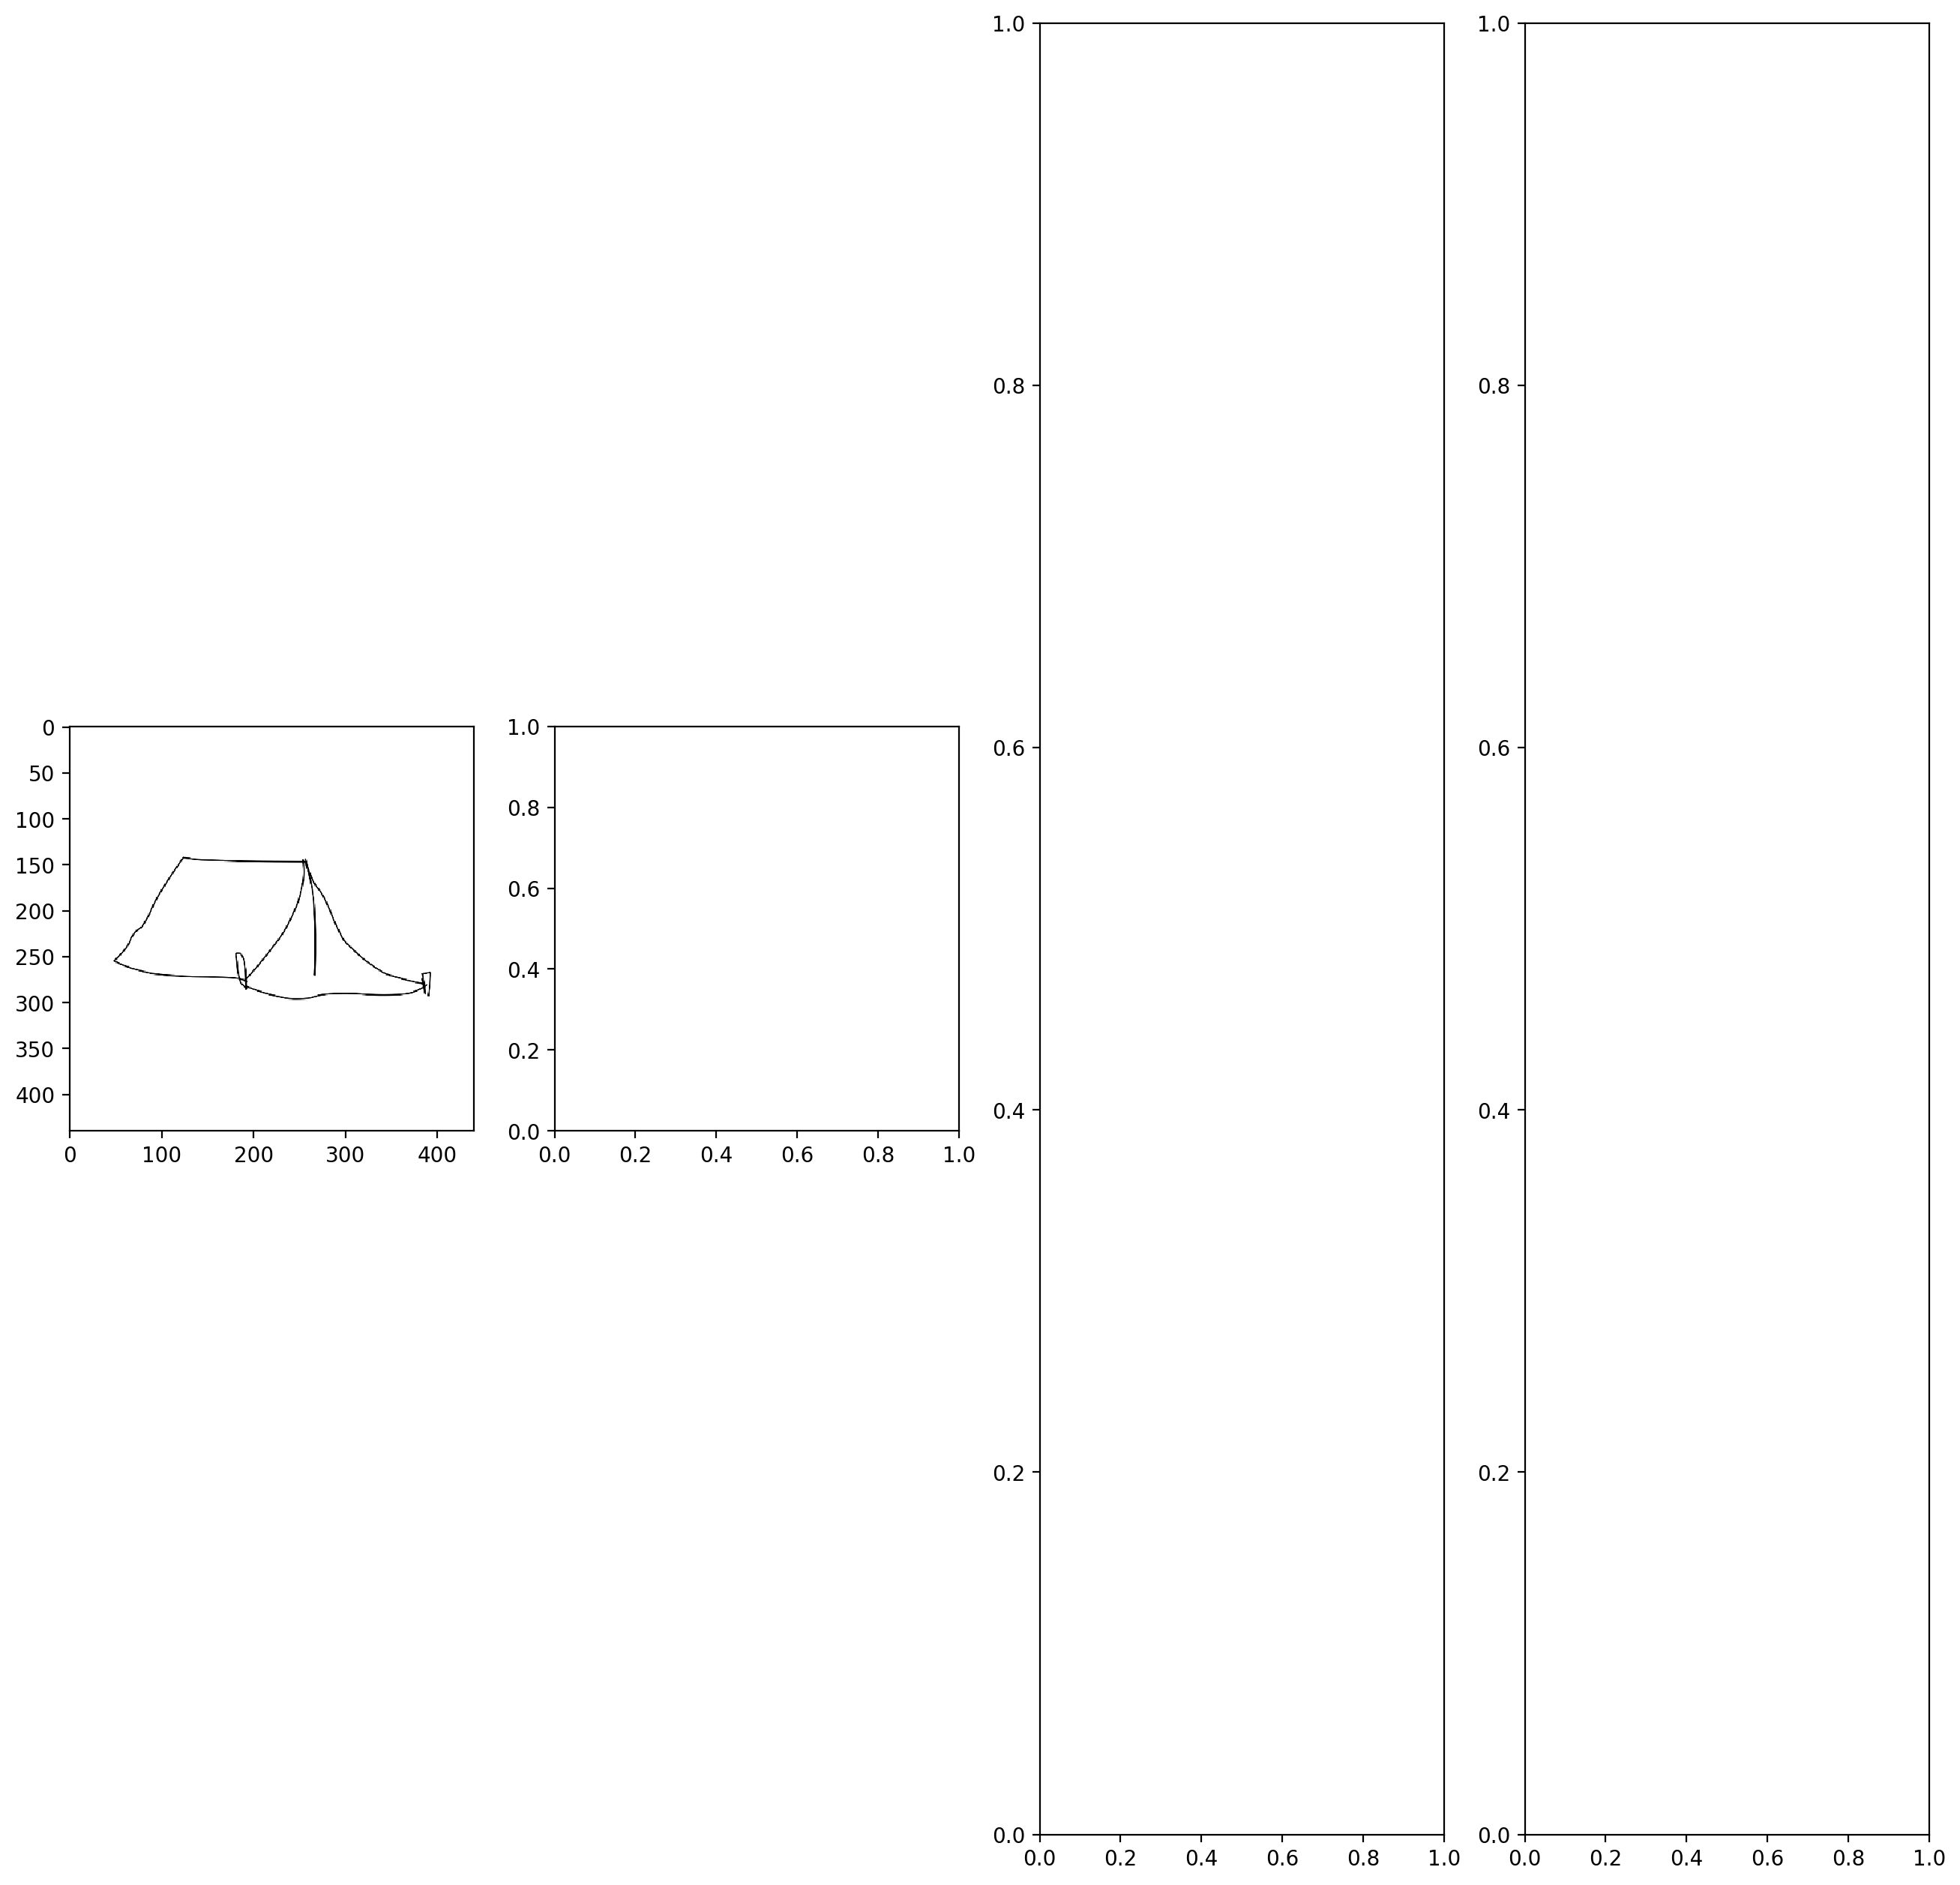

In [76]:
DataVisualizer.plot_batch(d[0])

In [52]:
from tensorflow.keras import utils

In [60]:
inputs = tf.keras.Input(shape=(440, 440, 1))

In [61]:
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), kernel_initializer='glorot_uniform')(inputs)

In [62]:
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), kernel_initializer='glorot_uniform')(x)

In [63]:
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), kernel_initializer='glorot_uniform')(x)

In [64]:
x = tf.keras.layers.Dense(units=1024, activation=tf.keras.layers.Activation('relu'))(x)

In [65]:
x = tf.keras.layers.Dense(len(d.labels), activation=tf.keras.layers.Activation('softmax'))(x)

In [66]:
model = tf.keras.Model(inputs=inputs, outputs=x)

In [67]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 440, 440, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 439, 439, 256)     1280      
                                                                 
 conv2d_16 (Conv2D)          (None, 438, 438, 256)     262400    
                                                                 
 conv2d_17 (Conv2D)          (None, 437, 437, 256)     262400    
                                                                 
 dense_7 (Dense)             (None, 437, 437, 1024)    263168    
                                                                 
 dense_8 (Dense)             (None, 437, 437, 60000)   61500000  
                                                                 
Total params: 62,289,248
Trainable params: 62,289,248
Non-t

In [70]:
d[0]

(array([[[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        [[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        [[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        ...,
 
        [[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255,

In [68]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [69]:
history = model.fit(
    d,
    batch_size=12,
    epochs=1,
)

ValueError: in user code:

    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\users\septimiu\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, 437, 437, 60000) are incompatible
